In [ ]:
'''
【课程3.6】  基本图表绘制 plt.plot()

图表类别：线形图、柱状图、密度图，以横纵坐标两个维度为主
同时可延展出多种其他图表样式

plt.plot(kind='line', ax=None, figsize=None, use_index=True, title=None, grid=None, legend=False, 
style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, 
rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, label=None, secondary_y=False, **kwds)

'''

In [1]:
# 导包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 魔法函数
%matplotlib inline

2000-01-01    -1.221171
2000-01-02     0.565258
2000-01-03    -1.040357
2000-01-04    -1.999923
2000-01-05    -1.631132
                ...    
2002-09-22    35.567683
2002-09-23    35.757061
2002-09-24    34.953210
2002-09-25    34.192935
2002-09-26    35.502130
Freq: D, Length: 1000, dtype: float64


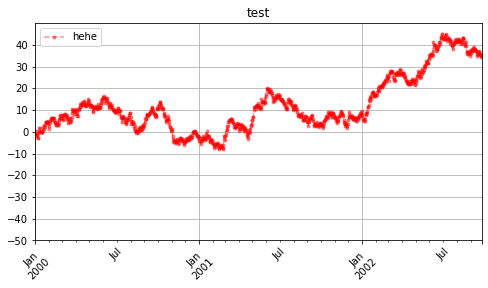

In [14]:
# Series直接生成图表
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
print(ts)
ts.plot(kind='line', 
       label='hehe', 
       style='--g.',
       color='r',
       alpha=0.4,
       use_index=True,
       rot=45,
       grid=True,
       ylim=[-50, 50],
       yticks=list(range(-50, 50, 10)),
       figsize=(8, 4),
       title='test',
       legend=True)
#plt.grid(True, linestyle = "--",color = "gray", linewidth = "0.5",axis = 'x')  # 网格
plt.legend()
# Series.plot()：series的index为横坐标，value为纵坐标
# kind → line,bar,barh...（折线图，柱状图，柱状图-横...）
# label → 图例标签，Dataframe格式以列名为label
# style → 风格字符串，这里包括了linestyle（-），marker（.），color（g）
# color → 颜色，有color指定时候，以color颜色为准
# alpha → 透明度，0-1
# use_index → 将索引用为刻度标签，默认为True
# rot → 旋转刻度标签，0-360
# grid → 显示网格，一般直接用plt.grid
# xlim,ylim → x,y轴界限
# xticks,yticks → x,y轴刻度值
# figsize → 图像大小
# title → 图名
# legend → 是否显示图例，一般直接用plt.legend()
# 也可以 → plt.plot()

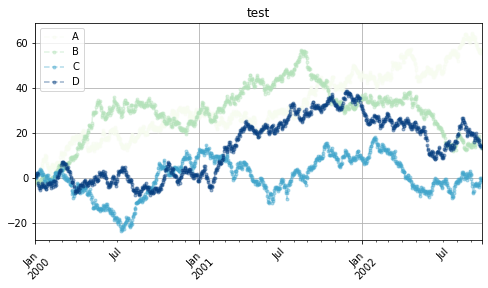

In [15]:
# DataFrame直接生成图表
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df.plot(kind='line',
       style='--.',
       alpha=0.4,
       use_index=True,
       rot=45,
       grid=True,
       figsize=(8, 4),
       title='test',
       legend=True,
       subplots=False,
       colormap='GnBu')
# subplots是否将各个列绘制到不同的图表

In [ ]:
'''

【课程3.7】  柱状图、堆叠图

plt.plot(kind='bar/barh') , plt.bar()
 
'''

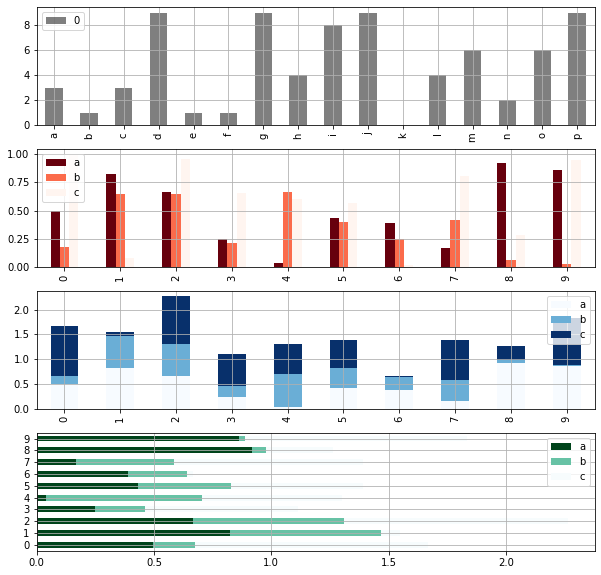

In [36]:
# 柱状图
fig,axes = plt.subplots(4, 1, figsize=(10, 10))  # 创建一个4行1列的子图区域
s = pd.DataFrame(np.random.randint(0, 10, 16), index=list('abcdefghijklmnop'))
df = pd.DataFrame(np.random.rand(10, 3), columns=list('abc'))
s.plot(kind='bar', color='k', grid=True, alpha=0.5, ax=axes[0])  # ax参数:选择第几个子图
# 单系列柱状图方法一:plt.plot(kind='bar/barh')
df.plot(kind='bar', ax=axes[1], grid=True, colormap='Reds_r')
# 单系列柱状图
df.plot(kind='bar', ax=axes[2], grid=True, colormap='Blues', stacked=True)
# 多系列堆叠图
# stacked:堆叠

df.plot.barh(ax=axes[3], grid=True, stacked=True, colormap='BuGn_r')

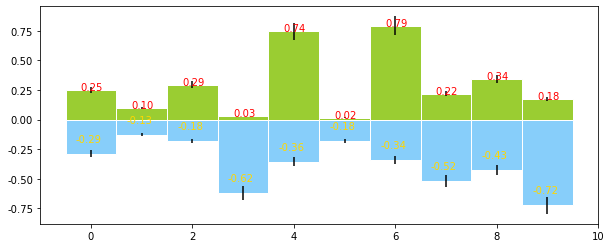

In [55]:
# 柱状图 plt.bar()
plt.figure(figsize=(10, 4))
x = np.arange(10)
y1 = np.random.rand(10)
y2 = -np.random.rand(10)

plt.bar(x, y1, width=1, facecolor='yellowgreen', edgecolor='white', yerr=y1*0.1)
plt.bar(x, y2, width=1, facecolor='lightskyblue', edgecolor='white', yerr=y2*0.1)
# x,y参数:x,y值
# width:宽度比例
# facecolor:柱状图里填充的颜色，edgecolor是边框的颜色
# left-每个柱x轴左边界，bottom-每个柱y轴下边界，bottom扩展即可化为甘特图
# align:决定整个bar图分布，默认left表示默认从左边界开始绘制，center会将图绘制在中间位置
# xerr/yerr:x/y方向error bar

for i, j in zip(x, y1):
    plt.text(i-0.2, j-0.001, '%.2f' % j, color='red')
for i, j in zip(x, y2):
    plt.text(i-0.3, j+0.1, '%.2f' % j, color='gold')
# 给图添加text
# zip()函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表

          Freeze    Wind   Flood   Quake    Hail
100 year   66386  174296   75131  577908   32015
50 year    58230  381139   78045   99308  160454
20 year    89135   80552  152558  497981  603535
10 year    78415   81858  150656  193263   69638
5 year    139361  331509  343164  781380   52269


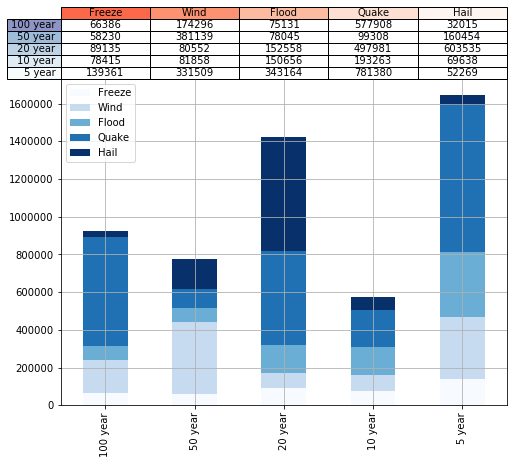

In [78]:
# 外嵌图表plt.table()
# table(cellText=None, cellColours=None,cellLoc='right', colWidths=None,rowLabels=None, rowColours=None, rowLoc='left',
# colLabels=None, colColours=None, colLoc='center',loc='bottom', bbox=None)

data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]
df = pd.DataFrame(data, columns=('Freeze', 'Wind', 'Flood', 'Quake', 'Hail'), index=rows)
print(df)
df.plot(kind='bar', grid=True, colormap='Blues', stacked=True, figsize=(8, 6))

# 创建堆叠图
plt.table(cellText=data, cellLoc='center', rowLabels=rows, colLabels=df.columns, rowColours=plt.cm.BuPu(np.linspace(0, 0.5, 5))[::-1],
         colColours=plt.cm.Reds(np.linspace(0, 0.5, 5))[::-1], rowLoc='right', loc='top')
# BuPu可替换成其他colormap
# cellText：表格文本
# cellLoc：cell内文本对齐位置
# rowLabels：行标签
# colLabels：列标签
# rowLoc：行标签对齐位置
# loc：表格位置 → left，right，top，bottom


In [ ]:
'''

【课程3.8】  面积图、填图、饼图

plt.plot.area()
plt.fill(), plt.fill_between()
plt.pie()

'''

          a         b         c         d
0  0.167763  0.299461  0.060917  0.809034
1  0.397711  0.657296  0.398817  0.984898
2  0.261468  0.339848  0.934931  0.423405
3  0.575250  0.681653  0.586164  0.774624
4  0.145543  0.389758  0.602775  0.900274
5  0.914505  0.867918  0.066573  0.477991
6  0.314092  0.154751  0.508558  0.515641
7  0.631953  0.924459  0.093937  0.271490
8  0.924862  0.214424  0.053864  0.874087
9  0.262898  0.192370  0.312076  0.516263
****************************************************************************************
          a         b         c         d
0  2.512293 -1.402279  0.213515  1.387231
1 -0.814580 -0.975581 -1.239094 -1.550992
2 -1.327509  0.995269  0.282314 -1.832463
3 -0.837139  0.088957 -1.291571  0.558646
4 -0.294665  1.390920  1.247537 -1.420316
5 -0.217723 -0.966776 -0.321136 -0.411695
6  0.181658  1.724424 -0.636145  1.833246
7  0.003819 -1.050545  0.438737  1.237286
8  1.714157  1.004765 -0.281086 -1.393007
9  0.235713  0.311138 -0.1269

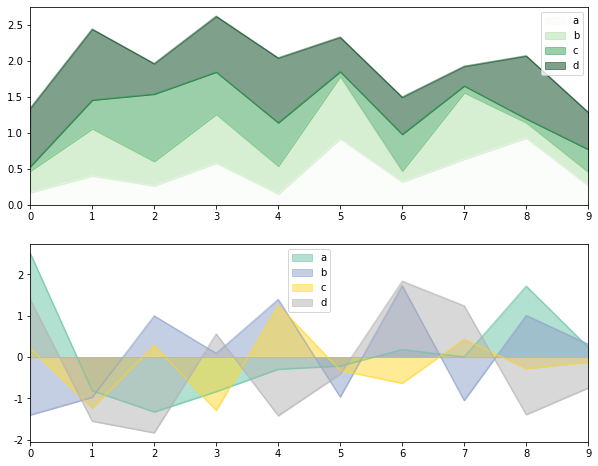

In [84]:
# 面积图
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

df1 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
print(df1)
print('*' * 88)
df2 = pd.DataFrame(np.random.randn(10, 4), columns=['a', 'b', 'c', 'd'])
print(df2)

df1.plot.area(colormap='Greens', alpha=0.5, ax=axes[0])
df2.plot.area(colormap='Set2', alpha=0.5, ax=axes[1], stacked=False)
# 使用Series.plot.area()和DataFrame.plot.area()创建面积图
# stacked:是否堆叠，默认情况下，面积图被堆叠
# 为了产生堆积面积图，每列必须都是正值或者都是负值
# 当数据有NaN值时，自动填充0，所以需要清洗掉缺失值

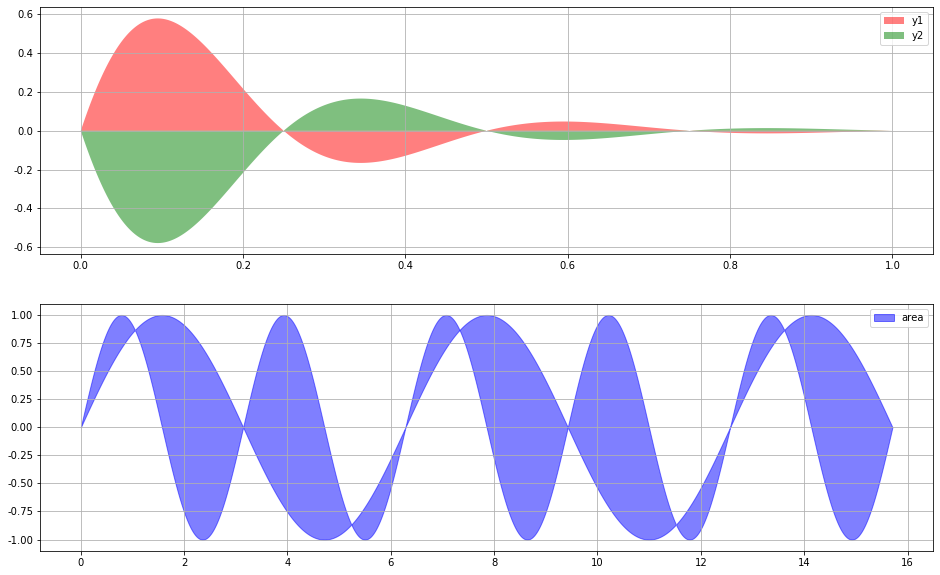

In [94]:
# 填图
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

x = np.linspace(0, 1, 500)
y1 = np.sin(4 * np.pi * x) * np.exp(-5 * x)
y2 = -np.sin(4 * np.pi * x) * np.exp(-5 * x)

axes[0].fill(x, y1, 'r', alpha=0.5, label='y1')
axes[0].fill(x, y2, 'g', alpha=0.5, label='y2')
axes[0].legend()
axes[0].grid()

x = np.linspace(0, 5 * np.pi, 1000) 
y1 = np.sin(x)  
y2 = np.sin(2 * x)
axes[1].fill_between(x, y1, y2, color='b', alpha=0.5, label='area')
axes[1].grid()
axes[1].legend()

a    2.205648
b    2.831242
c    0.990046
d    2.911245
Name: series, dtype: float64


([<matplotlib.patches.Wedge at 0x1217f7d00>,
 [Text(1.1428035286839573, 1.1198214566740072, 'a'),
  Text(-1.2413940270580548, 0.8419862644868892, 'b'),
  Text(-1.1004716982967357, -1.0192948745323398, 'c'),
  Text(0.7808974019028462, -1.2807026382815743, 'd')],
 [Text(0.49997654379923134, 0.4899218872948782, '24.68%'),
  Text(-0.4965576108232219, 0.3367945057947556, '31.68%'),
  Text(-0.44018867931869426, -0.40771794981293585, '11.08%'),
  Text(0.31235896076113845, -0.5122810553126297, '32.57%')])

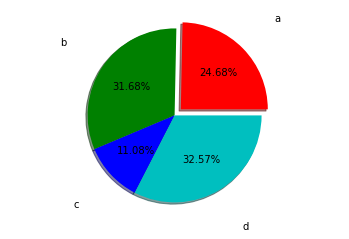

In [108]:
# 饼图 plt.pie()
# plt.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, 
# radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, hold=None, data=None)

s = pd.Series(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], name='series')
print(s)

plt.axis('equal')  # 保证长宽度相等
plt.pie(s,
       explode=[0.1, 0, 0, 0],
       labels=s.index,
       colors=['r', 'g', 'b', 'c'],
       autopct='%.2f%%',
       pctdistance=0.6,
       shadow=True,
       labeldistance=1.5,
       startangle=None,
       radius=None,
       counterclock=True,
       wedgeprops=None,
       textprops=None,
       frame=False,
       rotatelabels=False,)
# 第一个参数：数据
# explode：指定每部分的偏移量
# labels：标签
# colors：颜色
# autopct：饼图上的数据标签显示方式
# pctdistance：每个饼切片的中心和通过autopct生成的文本开始之间的比例
# labeldistance：被画饼标记的直径,默认值：1.1
# shadow：阴影
# startangle：开始角度
# radius：半径
# frame：图框
# counterclock：指定指针方向，顺时针或者逆时针

In [ ]:
'''

【课程3.9】  直方图
plt.hist(x, bins=10, range=None, normed=False, weights=None, cumulative=False, bottom=None, 
histtype='bar', align='mid', orientation='vertical',rwidth=None, log=False, color=None, label=None, 
stacked=False, hold=None, data=None, **kwargs)

'''

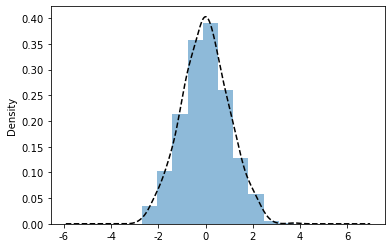

In [118]:
s = pd.Series(np.random.randn(1000))
s.hist(bins=10, grid=True, align='mid', orientation='vertical',alpha=0.5, density=True)
# bin：箱子的宽度
# density 标准化
# histtype 风格，bar，barstacked，step，stepfilled
# orientation 水平还是垂直{‘horizontal’, ‘vertical’}
# align : {‘left’, ‘mid’, ‘right’}, optional(对齐方式)

s.plot(kind='kde', style='k--')
# 密度图

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x130deb130>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

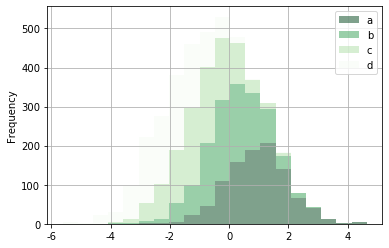

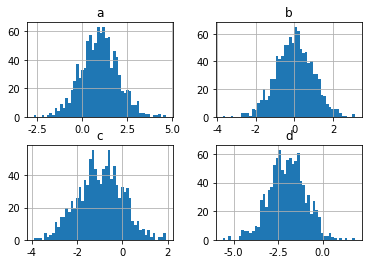

In [116]:
# 堆叠直方图

plt.figure(num=1)
df = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1, 'd': np.random.randn(1000)-2},
                   columns=['a', 'b', 'c','d'])
df.plot.hist(stacked=True,
             bins=20,
             colormap='Greens_r',
             alpha=0.5,
             grid=True)
# 使用DataFrame.plot.hist()和Series.plot.hist()方法绘制
# stacked：是否堆叠

df.hist(bins=50)
# 生成多个直方图

In [ ]:
'''
【课程3.10】  散点图、矩阵散点图

plt.scatter(), pd.scatter_matrix()
 
'''

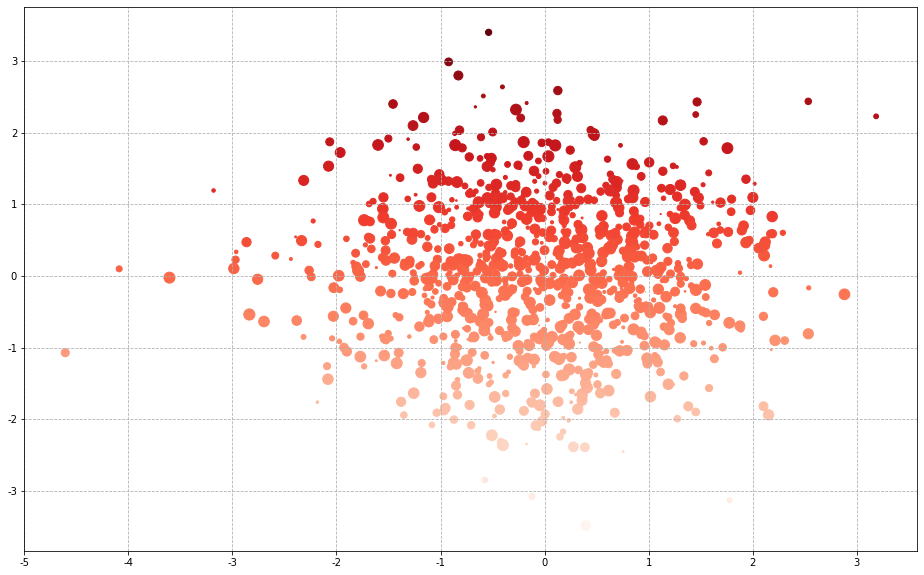

In [134]:
plt.figure(figsize=(16, 10))
x = np.random.randn(1000)
y = np.random.randn(1000)

plt.scatter(x, y, s=np.random.rand(1000)*500, cmap='Reds', marker='.', c=y)
plt.grid(linestyle='--')
# s：散点的大小
# c：散点的颜色
# vmin,vmax：亮度设置，标量
# cmap：colormap

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1355a1fa0>,
      dtype=object)

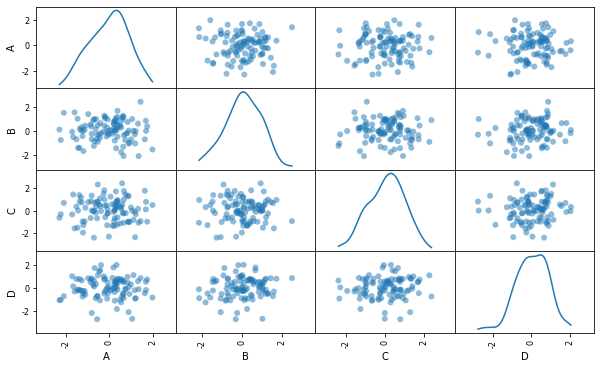

In [141]:
# pd.plotting.scatter_matrix()  散点矩阵
# pd.plotting.scatter_matrix(frame, alpha=0.5, figsize=None, ax=None, 
# grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05, **kwds)

df = pd.DataFrame(np.random.randn(100, 4), columns=list('ABCD'))
pd.plotting.scatter_matrix(df, figsize=(10, 6), alpha=0.5, marker='o', diagonal='kde', range_padding=0.5)